# Suppress the Warnings

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import xticks
%matplotlib inline

In [3]:
# Data display coustomization
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Data Loading and Preparation

In [4]:
lead = pd.read_csv(r"C:\Users\saura\Downloads\datasets\Lead_Scoring.csv")
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Converted
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened,1
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified,1


# Data Dictionary

In [5]:
word=pd.read_excel(r"C:\Users\saura\Downloads\datasets\Leads Data Dictionary.xlsx")
word.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,NaN,NaN,NaN
1,NaN,Variables,Description
2,NaN,Prospect ID,A unique ID with which the customer is identif...
3,NaN,Lead Number,A lead number assigned to each lead procured.
4,NaN,Lead Origin,The origin identifier with which the customer ...


In [6]:
pd.set_option('display.max_colwidth', -1)
word.drop('Unnamed: 0',inplace=True,axis=1)
word.columns = word.iloc[1]
word = word.iloc[2:]
word.reset_index(drop=True, inplace=True)
word.head(len(word))

1,Variables,Description
0,Prospect ID,A unique ID with which the customer is identified.
1,Lead Number,A lead number assigned to each lead procured.
2,Lead Origin,"The origin identifier with which the customer was identified to be a lead. Includes API, Landing Page Submission, etc."
3,Lead Source,"The source of the lead. Includes Google, Organic Search, Olark Chat, etc."
4,Do Not Email,An indicator variable selected by the customer wherein they select whether of not they want to be emailed about the course or not.
5,Do Not Call,An indicator variable selected by the customer wherein they select whether of not they want to be called about the course or not.
6,Converted,The target variable. Indicates whether a lead has been successfully converted or not.
7,TotalVisits,The total number of visits made by the customer on the website.
8,Total Time Spent on Website,The total time spent by the customer on the website.
9,Page Views Per Visit,Average number of pages on the website viewed during the visits.


# Checking for Duplicates

In [7]:
lead_dub = lead.copy()

# Checking for duplicates and dropping the entire duplicate row if any
lead_dub.drop_duplicates(subset=None, inplace=True)
lead_dub.shape

(9240, 37)

In [8]:
lead.shape


(9240, 37)

The shape after running the drop duplicate command is same as the original dataframe.

Hence we can conclude that there were zero duplicate values in the dataset.

# Data Inspection

In [9]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

In [10]:
lead.describe()

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score,Converted
count,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000,9240.000000
mean,617188.435606,3.445238,487.698268,2.362820,14.306252,16.344883,0.385390
std,23405.995698,4.854853,548.021466,2.161418,1.386694,1.811395,0.486714
min,579533.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000
25%,596484.500000,1.000000,12.000000,1.000000,14.000000,15.000000,0.000000
50%,615479.000000,3.000000,248.000000,2.000000,14.000000,16.000000,0.000000
75%,637387.250000,5.000000,936.000000,3.000000,15.000000,18.000000,1.000000
max,660737.000000,251.000000,2272.000000,55.000000,18.000000,20.000000,1.000000


# Data Cleaning

In [11]:
# As we can observe that there are select values for many column.
#This is because customer did not select any option from the list, hence it shows select.
# Select values are as good as NULL.

# Converting 'Select' values to NaN.
lead = lead.replace('Select', np.nan)
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Converted
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened,1
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified,1


In [12]:
lead.isnull().sum()


Prospect ID                                      0   
Lead Number                                      0   
Lead Origin                                      0   
Lead Source                                      36  
Do Not Email                                     0   
Do Not Call                                      0   
TotalVisits                                      137 
Total Time Spent on Website                      0   
Page Views Per Visit                             137 
Last Activity                                    103 
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                           0   
Magazine                                         0   
Newspaper Article                                0   
X Education Forums          

In [13]:
round(100*(lead.isnull().sum()/len(lead.index)), 2)


Prospect ID                                      0.00 
Lead Number                                      0.00 
Lead Origin                                      0.00 
Lead Source                                      0.39 
Do Not Email                                     0.00 
Do Not Call                                      0.00 
TotalVisits                                      1.48 
Total Time Spent on Website                      0.00 
Page Views Per Visit                             1.48 
Last Activity                                    1.11 
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                           0.00 
Magazine                                         0.00 
Newspaper Article                                0.00 
X Educatio

In [14]:
# we will drop the columns having more than 60% NA values.
lead = lead.drop(lead.loc[:,list(round(100*(lead.isnull().sum()/len(lead.index)), 2)>60)].columns, 1)

In [15]:
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Prospect ID                                      0.00 
Lead Number                                      0.00 
Lead Origin                                      0.00 
Lead Source                                      0.39 
Do Not Email                                     0.00 
Do Not Call                                      0.00 
TotalVisits                                      1.48 
Total Time Spent on Website                      0.00 
Page Views Per Visit                             1.48 
Last Activity                                    1.11 
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                           0.00 
Magazine                                         0.00 
Newspaper Article                                0.00 
X Education Forums                               0.00 
Newspaper 

In [16]:
#dropping Lead Number and Prospect ID since they have all unique values

lead.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [17]:
lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Converted
0,API,Olark Chat,No,No,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified,0
1,API,Organic Search,No,No,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened,0
2,Landing Page Submission,Direct Traffic,No,No,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened,1
3,Landing Page Submission,Direct Traffic,No,No,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified,0
4,Landing Page Submission,Google,No,No,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified,1


Now we will take care of null values in each column one by one.

In [18]:
# Lead Quality: Indicates the quality of lead based on the data and intuition the the employee who has been assigned to the lead

In [19]:
lead['Lead Quality'].value_counts()

Might be             1560
Not Sure             1092
High in Relevance    637 
Worst                601 
Low in Relevance     583 
Name: Lead Quality, dtype: int64

In [20]:
lead['Lead Quality'].describe()

count     4473    
unique    5       
top       Might be
freq      1560    
Name: Lead Quality, dtype: object

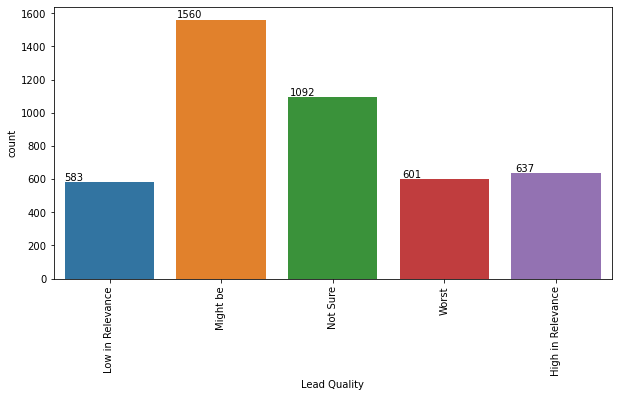

In [21]:
plt.figure(figsize = (10,5))
ax= sns.countplot(lead['Lead Quality'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
plt.show()

In [22]:
# As Lead quality is based on the impression employee & the lead, 
#if anything is left blank we can impute 'Not Sure' in NaN safely.

lead['Lead Quality'] = lead['Lead Quality'].replace(np.nan, 'Not Sure')

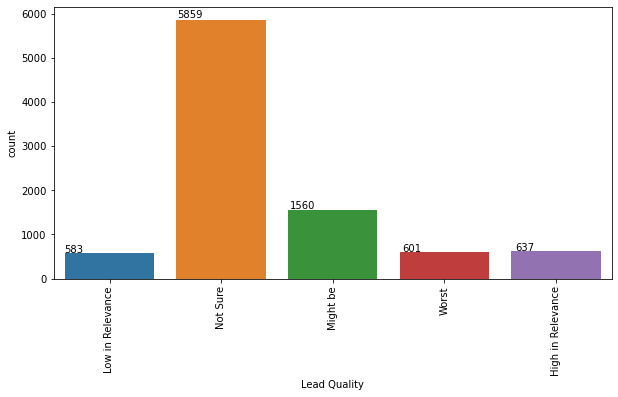

In [23]:
plt.figure(figsize = (10,5))
ax= sns.countplot(lead['Lead Quality'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
plt.show()

In [24]:
#This are few field where human psychology, consumer behavior & business understanding overpowers the statistic interpretation of the data

In [25]:
# Asymmetrique Activity Index  |
# Asymmetrique Profile Index   \   An index and score assigned to each customer
# Asymmetrique Activity Score  |    based on their activity and their profile
# Asymmetrique Profile Score   \

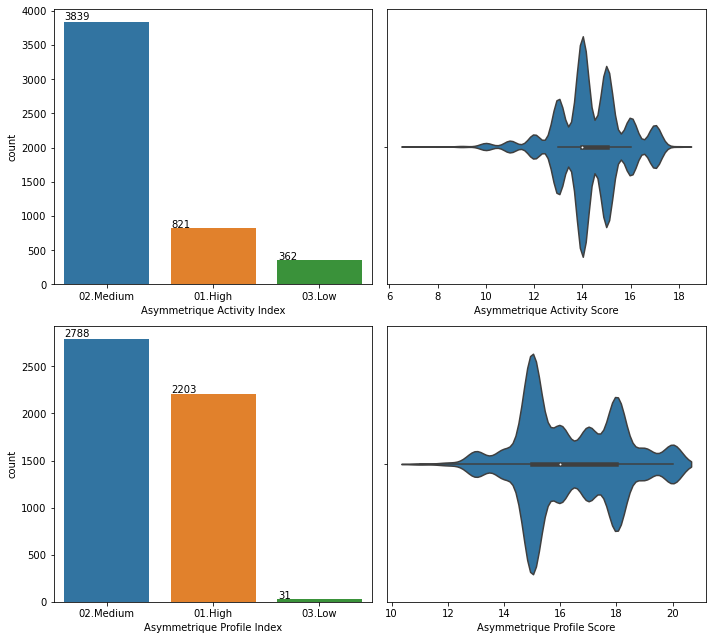

In [26]:
fig, axs = plt.subplots(2,2, figsize = (10,9))
plt1 = sns.countplot(lead['Asymmetrique Activity Index'], ax = axs[0,0])
for p in plt1.patches:
    plt1.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt2 = sns.violinplot(lead['Asymmetrique Activity Score'], ax = axs[0,1])
plt3 = sns.countplot(lead['Asymmetrique Profile Index'], ax = axs[1,0])
for p in plt3.patches:
    plt3.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt4 = sns.violinplot(lead['Asymmetrique Profile Score'], ax = axs[1,1])
plt.tight_layout()

In [27]:
# There is too much variation in thes parameters so its not reliable to impute any value in it. 
# 45% null values means we need to drop these columns.

In [28]:
lead = lead.drop(['Asymmetrique Activity Index','Asymmetrique Activity Score',
                  'Asymmetrique Profile Index','Asymmetrique Profile Score'],1)

In [29]:
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Lead Origin                                      0.00 
Lead Source                                      0.39 
Do Not Email                                     0.00 
Do Not Call                                      0.00 
TotalVisits                                      1.48 
Total Time Spent on Website                      0.00 
Page Views Per Visit                             1.48 
Last Activity                                    1.11 
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                           0.00 
Magazine                                         0.00 
Newspaper Article                                0.00 
X Education Forums                               0.00 
Newspaper                                        0.00 
Digital Advertisement                            0.00 
Through Re

In [30]:
# City

In [31]:
lead.City.value_counts()

Mumbai                         3222
Thane & Outskirts              752 
Other Cities                   686 
Other Cities of Maharashtra    457 
Other Metro Cities             380 
Tier II Cities                 74  
Name: City, dtype: int64

In [32]:
lead.City.describe()


count     5571  
unique    6     
top       Mumbai
freq      3222  
Name: City, dtype: object

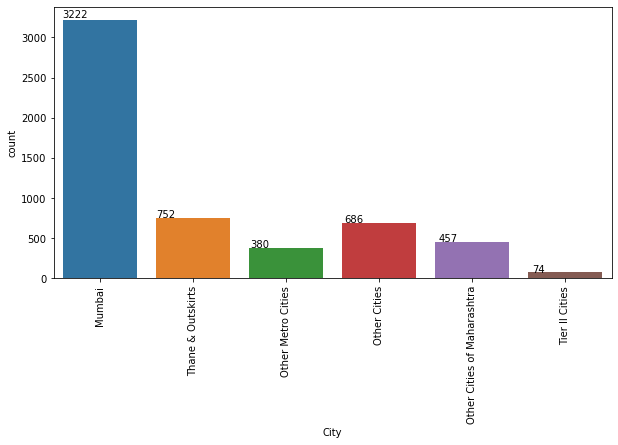

In [33]:
plt.figure(figsize = (10,5))
ax= sns.countplot(lead['City'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
plt.show()

In [34]:
# Around 57.8% of the data available  is Mumbai so we can impute Mumbai in the missing values.


In [35]:
lead['City'] = lead['City'].replace(np.nan, 'Mumbai')


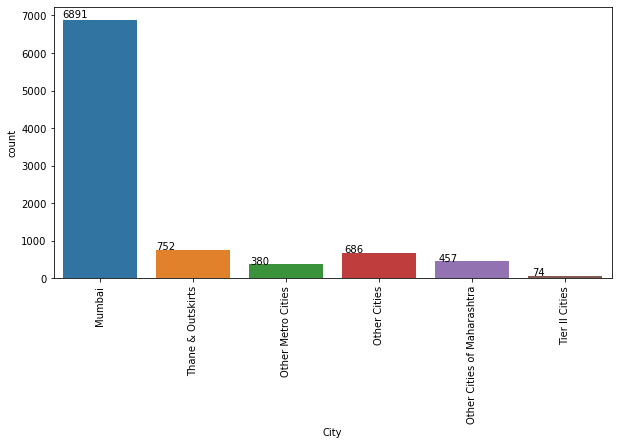

In [36]:
plt.figure(figsize = (10,5))
ax= sns.countplot(lead['City'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
plt.show()

In [37]:
# Specailization


In [38]:
lead.Specialization.describe()


count     5860              
unique    18                
top       Finance Management
freq      976               
Name: Specialization, dtype: object

In [39]:
lead.Specialization.value_counts()


Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness               73 
E-Business                           57 
Services Excellence                  40 
Name: Specialization, dtype: int64

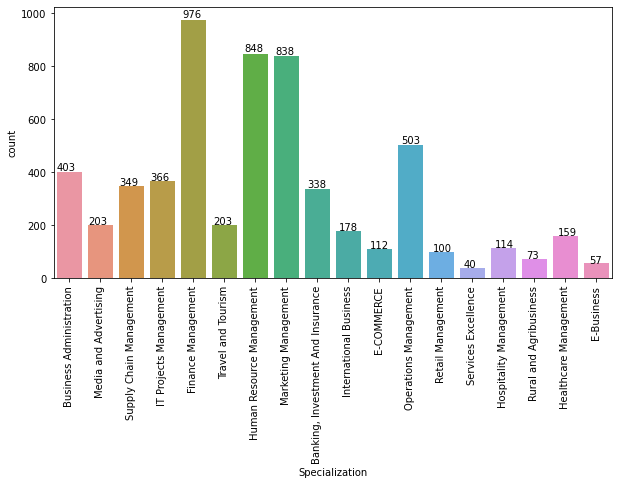

In [40]:
plt.figure(figsize = (10,5))
ax= sns.countplot(lead['Specialization'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
plt.show()

In [41]:
# It maybe the case that lead has not entered any specialization if his/her option is not availabe on the list,
#  may not have any specialization or is a student.
# Hence we can make a category "Others" for missing values. 

In [42]:
lead['Specialization'] = lead['Specialization'].replace(np.nan, 'Others')


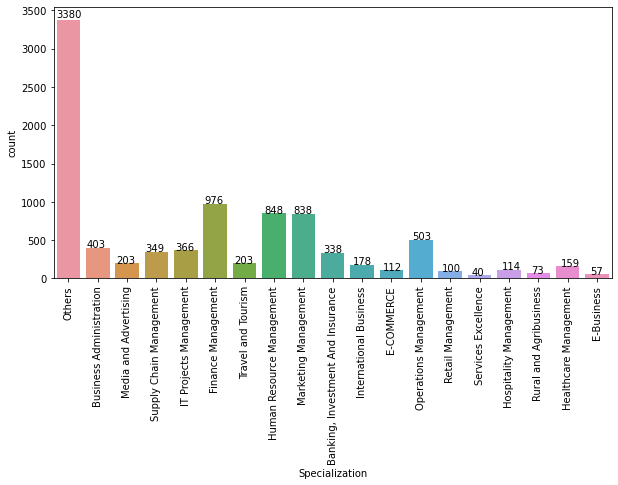

In [43]:
plt.figure(figsize = (10,5))
ax= sns.countplot(lead['Specialization'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
plt.show()

In [44]:
#tags

In [45]:
lead.Tags.describe()

count     5887                               
unique    26                                 
top       Will revert after reading the email
freq      2072                               
Name: Tags, dtype: object

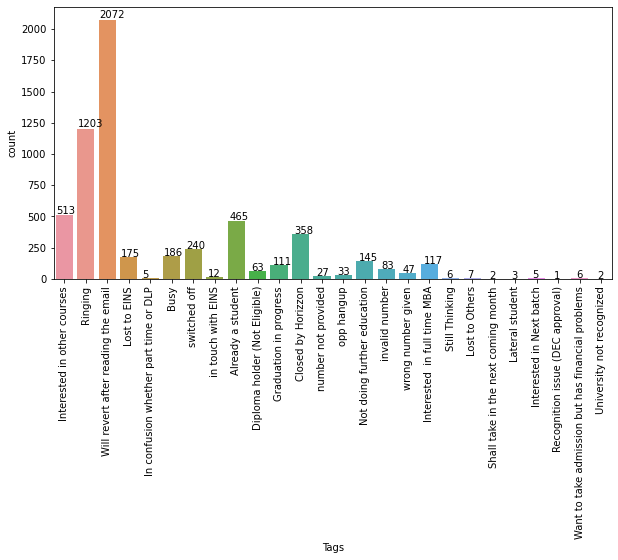

In [46]:
plt.figure(figsize = (10,5))
ax= sns.countplot(lead['Tags'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
plt.show()

In [47]:
# Blanks in the tag column may be imputed by 'Will revert after reading the email'.


In [48]:
lead['Tags'] = lead['Tags'].replace(np.nan, 'Will revert after reading the email')


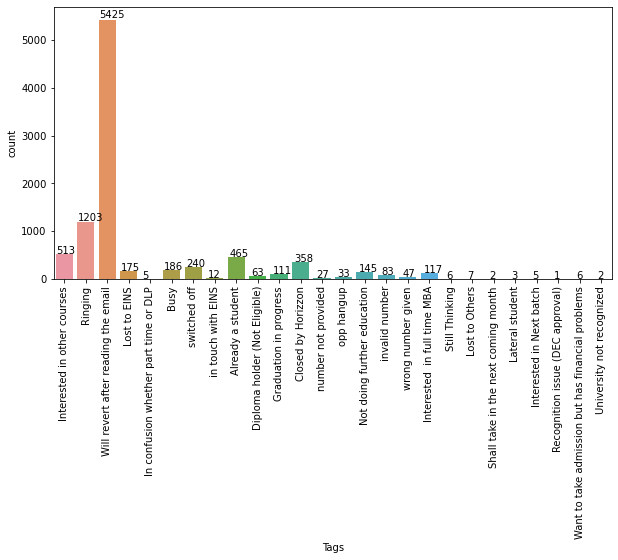

In [49]:
plt.figure(figsize = (10,5))
ax= sns.countplot(lead['Tags'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
plt.show()

In [50]:
# What matters most to you in choosing a course


In [51]:
lead['What matters most to you in choosing a course'].value_counts()


Better Career Prospects      6528
Flexibility & Convenience    2   
Other                        1   
Name: What matters most to you in choosing a course, dtype: int64

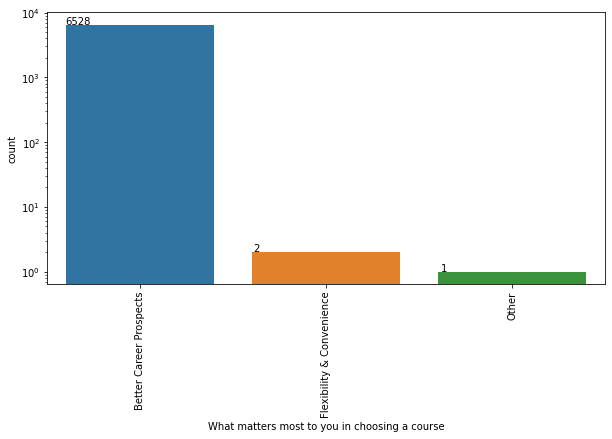

In [52]:
plt.figure(figsize = (10,5))
ax= sns.countplot(lead['What matters most to you in choosing a course'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

In [53]:
# Blanks in the this column may be imputed by 'Better Career Prospects'.


In [54]:
lead['What matters most to you in choosing a course'] = lead['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

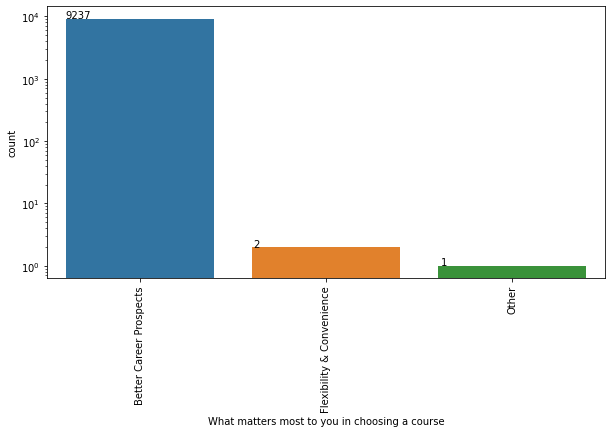

In [55]:
plt.figure(figsize = (10,5))
ax= sns.countplot(lead['What matters most to you in choosing a course'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

In [56]:
# Occupation


In [57]:
lead['What is your current occupation'].value_counts()


Unemployed              5600
Working Professional    706 
Student                 210 
Other                   16  
Housewife               10  
Businessman             8   
Name: What is your current occupation, dtype: int64

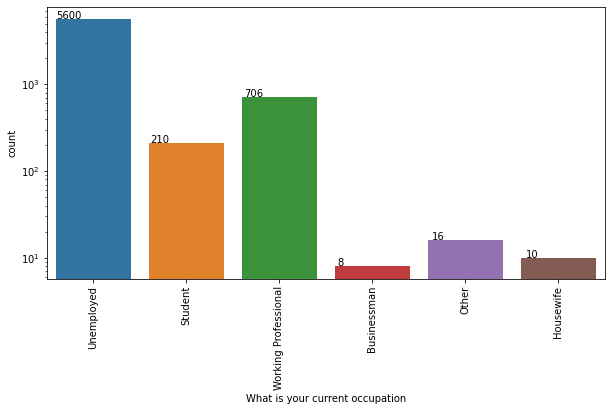

In [58]:
plt.figure(figsize = (10,5))
ax= sns.countplot(lead['What is your current occupation'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

In [59]:
# 86% entries are of Unemployed so we can impute "Unemployed" in it.


In [60]:
lead['What is your current occupation'] = lead['What is your current occupation'].replace(np.nan, 'Unemployed')

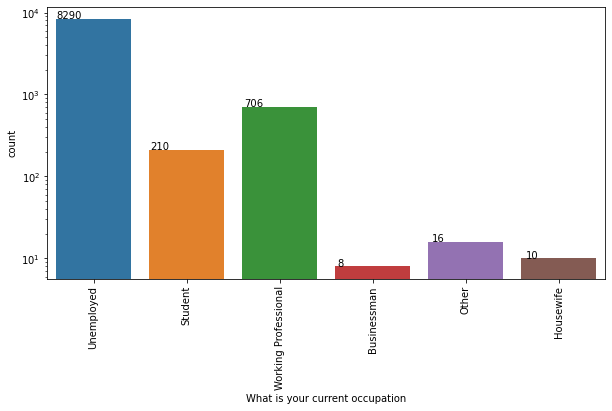

In [61]:
plt.figure(figsize = (10,5))
ax= sns.countplot(lead['What is your current occupation'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()


In [62]:
# Country


In [63]:
lead['Country'].value_counts()


India                   6492
United States           69  
United Arab Emirates    53  
Singapore               24  
Saudi Arabia            21  
United Kingdom          15  
Australia               13  
Qatar                   10  
Hong Kong               7   
Bahrain                 7   
Oman                    6   
France                  6   
unknown                 5   
South Africa            4   
Nigeria                 4   
Germany                 4   
Kuwait                  4   
Canada                  4   
Sweden                  3   
China                   2   
Asia/Pacific Region     2   
Uganda                  2   
Bangladesh              2   
Italy                   2   
Belgium                 2   
Netherlands             2   
Ghana                   2   
Philippines             2   
Russia                  1   
Switzerland             1   
Vietnam                 1   
Denmark                 1   
Tanzania                1   
Liberia                 1   
Malaysia      

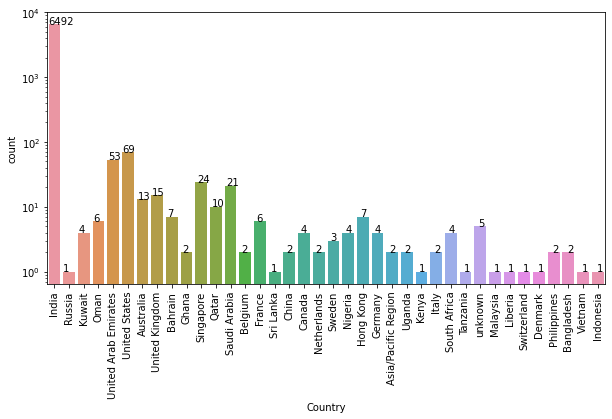

In [64]:
plt.figure(figsize = (10,5))
ax= sns.countplot(lead['Country'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

In [65]:
# Country is India for most values so let's impute the same in missing values.
lead['Country'] = lead['Country'].replace(np.nan, 'India')

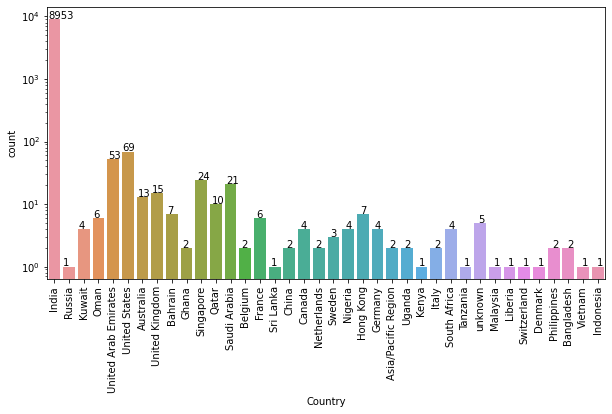

In [66]:
plt.figure(figsize = (10,5))
ax= sns.countplot(lead['Country'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

In [67]:
round(100*(lead.isnull().sum()/len(lead.index)), 2)


Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Through Recommendations     

In [68]:
# Rest missing values are under 1.5% so we can drop these rows.
lead.dropna(inplace = True)

In [69]:
round(100*(lead.isnull().sum()/len(lead.index)), 2)


Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                       

In [70]:
data_retailed= len(lead)* 100 / len(lead_dub)
print("{} % of original rows is available for EDA".format(round(data_retailed,2)))

98.2 % of original rows is available for EDA


In [71]:
lead.shape


(9074, 29)

In [72]:
#Now Data is free from all missing value and we can start with the analysis



# EDA(Univeriate Data Analysis)

Converted 

In [73]:
Converted = round((sum(lead['Converted'])/len(lead['Converted'].index))*100,2)

print("We have almost {} %  Converted rate".format(Converted))

We have almost 37.86 %  Converted rate


# Lead Origin

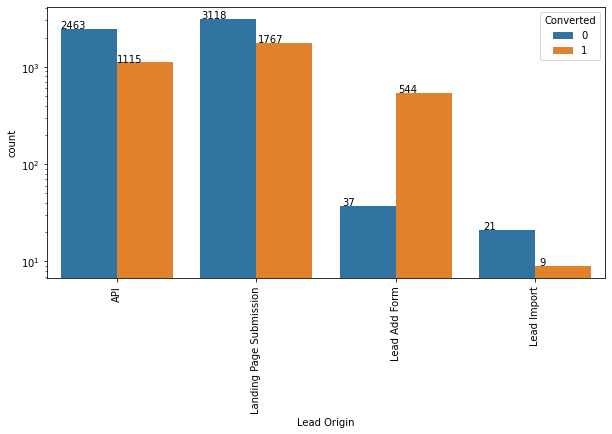

In [74]:
plt.figure(figsize = (10,5))
ax= sns.countplot(x = "Lead Origin", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

API and Landing Page Submission have 30-35% conversion rate but count of lead originated from them are considerable.
Lead Add Form has more than 90% conversion rate but count of lead are not very high.
Lead Import are very less in count.

To improve overall lead conversion rate, we need to focus more on improving lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

# Lead Source

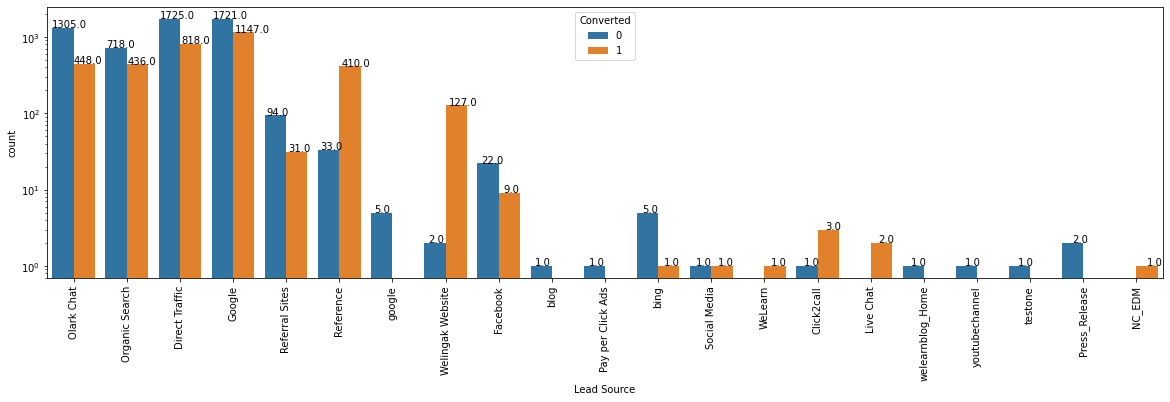

In [75]:
plt.figure(figsize = (20,5))
ax= sns.countplot(x = "Lead Source", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

In [76]:
lead['Lead Source'] = lead['Lead Source'].replace(['google'], 'Google')
lead['Lead Source'] = lead['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

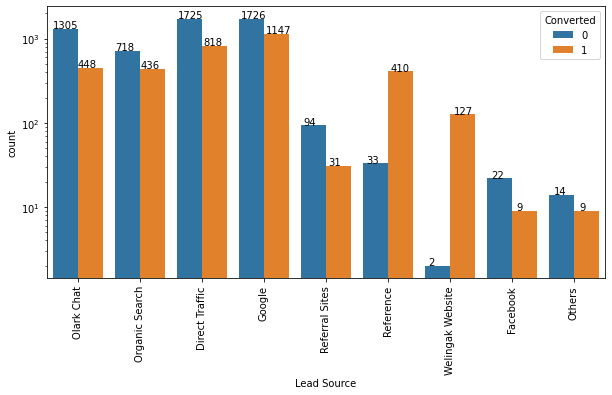

In [77]:
plt.figure(figsize = (10,5))
ax= sns.countplot(x = "Lead Source", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

Google and Direct traffic generates maximum number of leads.
Conversion Rate of reference leads and leads through welingak website is high.
To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.

## Do not Email & Do not Call

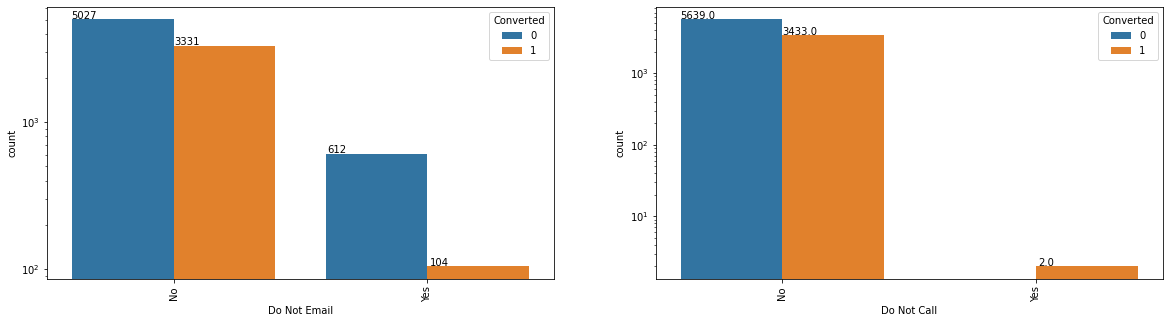

In [78]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
ax= sns.countplot(x = "Do Not Email", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.subplot(1,2,2)
ax= sns.countplot(x = "Do Not Call", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

## Total Visits

In [79]:
lead['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])


count    9074.000000
mean     3.456028   
std      4.858802   
min      0.000000   
5%       0.000000   
25%      1.000000   
50%      3.000000   
75%      5.000000   
90%      7.000000   
95%      10.000000  
99%      17.000000  
max      251.000000 
Name: TotalVisits, dtype: float64

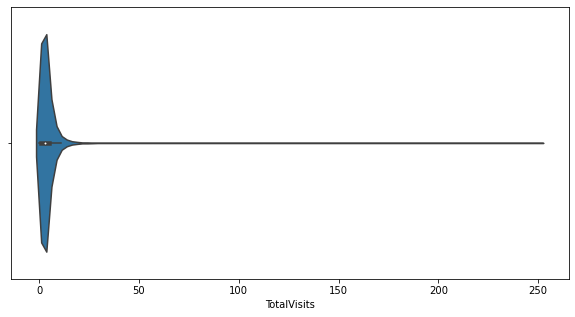

In [80]:
plt.figure(figsize = (10,5))
sns.violinplot(lead['TotalVisits'])
plt.show()

In [81]:
# As we can see there are a number of outliers in the data.
# We will cap the outliers to 95% value for analysis.

In [82]:
percentiles = lead['TotalVisits'].quantile([0.05,0.95]).values
lead['TotalVisits'][lead['TotalVisits'] <= percentiles[0]] = percentiles[0]
lead['TotalVisits'][lead['TotalVisits'] >= percentiles[1]] = percentiles[1]

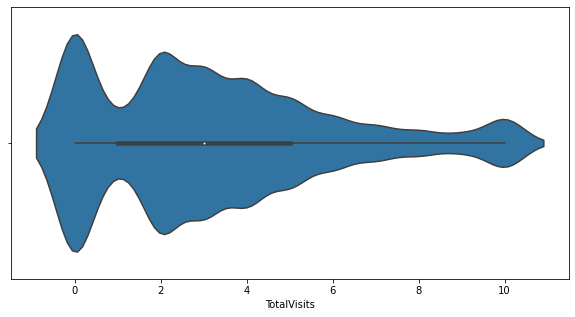

In [83]:
plt.figure(figsize = (10,5))
sns.violinplot(lead['TotalVisits'])
plt.show()

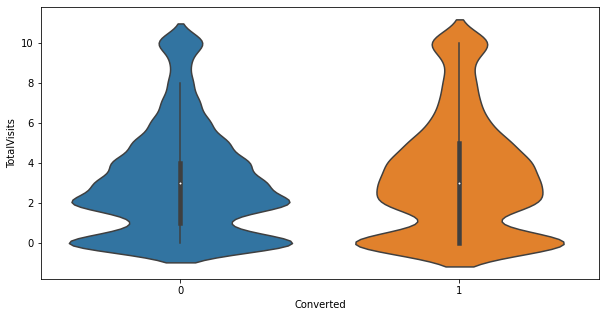

In [84]:
plt.figure(figsize = (10,5))
sns.violinplot(y = 'TotalVisits', x = 'Converted', data = lead)
plt.show()

Median for converted and not converted leads are the same.
Nothng conclusive can be said on the basis of Total Visits.

## Total time spent on website

In [85]:
lead['Total Time Spent on Website'].describe()


count    9074.000000
mean     482.887481 
std      545.256560 
min      0.000000   
25%      11.000000  
50%      246.000000 
75%      922.750000 
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

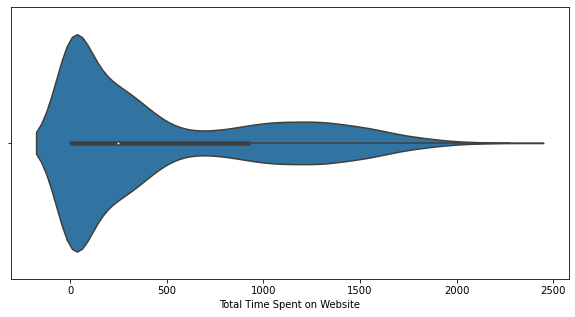

In [86]:
plt.figure(figsize = (10,5))
sns.violinplot(lead['Total Time Spent on Website'])
plt.show()

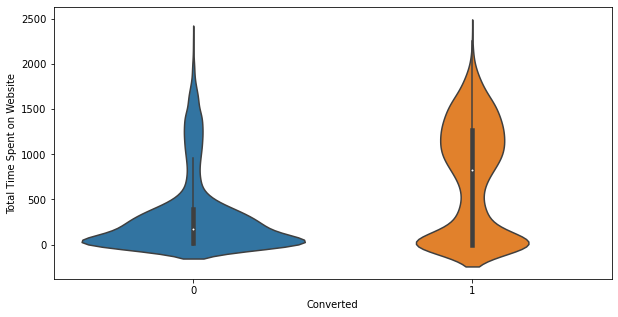

In [87]:
plt.figure(figsize = (10,5))
sns.violinplot(y = 'Total Time Spent on Website', x = 'Converted', data = lead)
plt.show()

Leads spending more time on the weblise are more likely to be converted.
Website should be made more engaging to make leads spend more time.

## Page views per visit

In [88]:
lead['Page Views Per Visit'].describe()

count    9074.000000
mean     2.370151   
std      2.160871   
min      0.000000   
25%      1.000000   
50%      2.000000   
75%      3.200000   
max      55.000000  
Name: Page Views Per Visit, dtype: float64

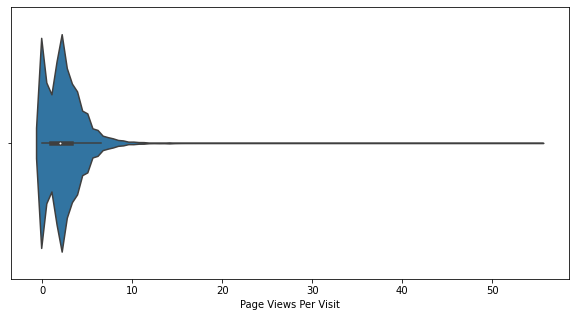

In [89]:
plt.figure(figsize = (10,5))
sns.violinplot(lead['Page Views Per Visit'])
plt.show()

In [90]:
# As we can see there are a number of outliers in the data.
# We will cap the outliers to 95% value for analysis.

In [91]:
percentiles = lead['Page Views Per Visit'].quantile([0.05,0.95]).values
lead['Page Views Per Visit'][lead['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
lead['Page Views Per Visit'][lead['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

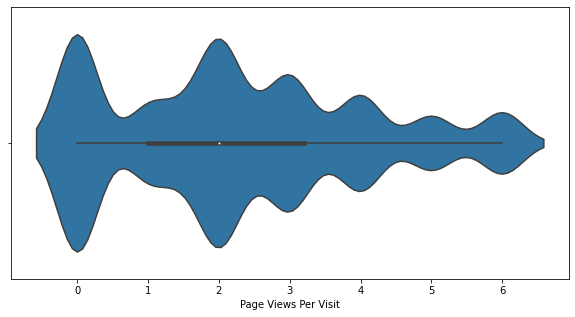

In [92]:
plt.figure(figsize = (10,5))
sns.violinplot(lead['Page Views Per Visit'])
plt.show()

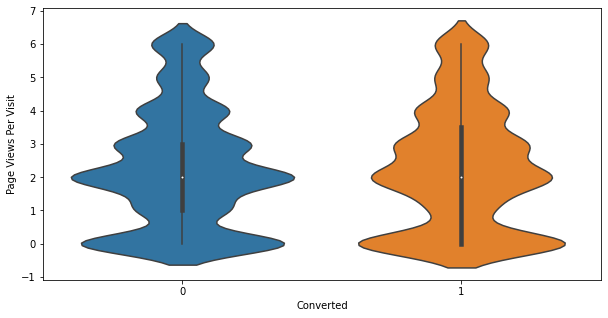

In [93]:
plt.figure(figsize = (10,5))
sns.violinplot(y = 'Page Views Per Visit', x = 'Converted', data = lead)
plt.show()

Median for converted and unconverted leads is the same.
Nothing can be said specifically for lead conversion from Page Views Per Visit

## Last Activity

In [94]:
lead['Last Activity'].describe()


count     9074        
unique    17          
top       Email Opened
freq      3432        
Name: Last Activity, dtype: object

In [95]:
lead['Last Activity'].value_counts()


Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation         972 
Page Visited on Website         640 
Converted to Lead               428 
Email Bounced                   312 
Email Link Clicked              267 
Form Submitted on Website       116 
Unreachable                     90  
Unsubscribed                    59  
Had a Phone Conversation        25  
View in browser link Clicked    6   
Approached upfront              5   
Email Received                  2   
Email Marked Spam               2   
Visited Booth in Tradeshow      1   
Resubscribed to emails          1   
Name: Last Activity, dtype: int64

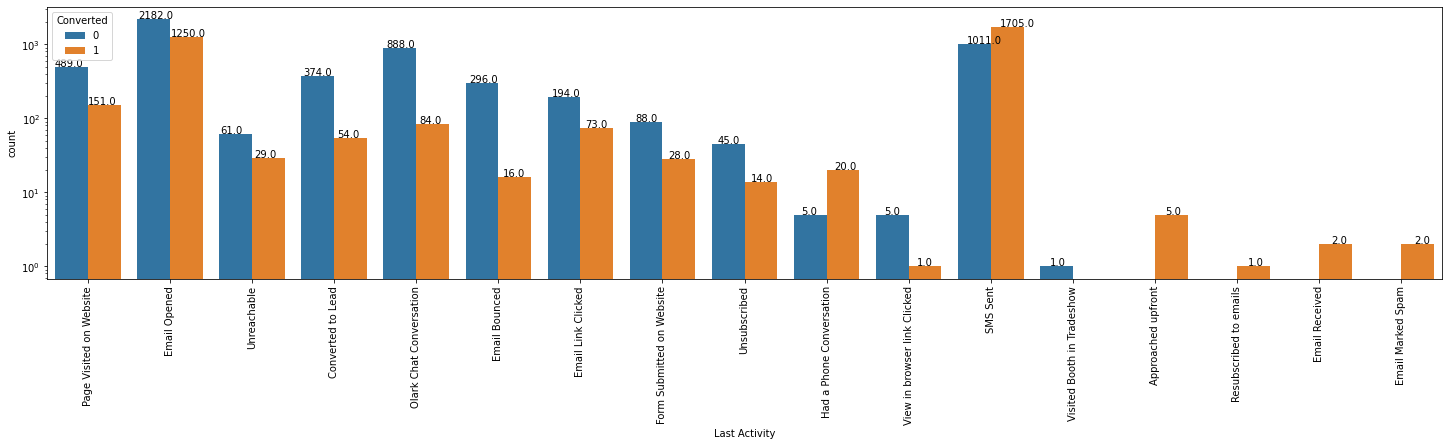

In [96]:
plt.figure(figsize = (25,5))
ax= sns.countplot(x = "Last Activity", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

In [97]:
# Let's keep considerable last activities as such and club all others to "Other_Activity"
lead['Last Activity'] = lead['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'],
                                                      'Other_Activity')

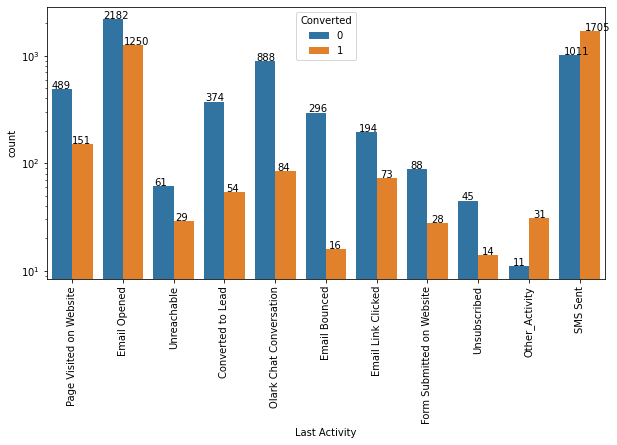

In [98]:
plt.figure(figsize = (10,5))
ax= sns.countplot(x = "Last Activity", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

Most of the lead have their Email opened as their last activity.
Conversion rate for leads with last activity as SMS Sent is almost 62%.

## Country

In [99]:
lead.Country.value_counts()


India                   8787
United States           69  
United Arab Emirates    53  
Singapore               24  
Saudi Arabia            21  
United Kingdom          15  
Australia               13  
Qatar                   10  
Hong Kong               7   
Bahrain                 7   
Oman                    6   
France                  6   
unknown                 5   
South Africa            4   
Nigeria                 4   
Germany                 4   
Kuwait                  4   
Canada                  4   
Sweden                  3   
China                   2   
Asia/Pacific Region     2   
Uganda                  2   
Bangladesh              2   
Italy                   2   
Belgium                 2   
Netherlands             2   
Ghana                   2   
Philippines             2   
Russia                  1   
Switzerland             1   
Vietnam                 1   
Denmark                 1   
Tanzania                1   
Liberia                 1   
Malaysia      

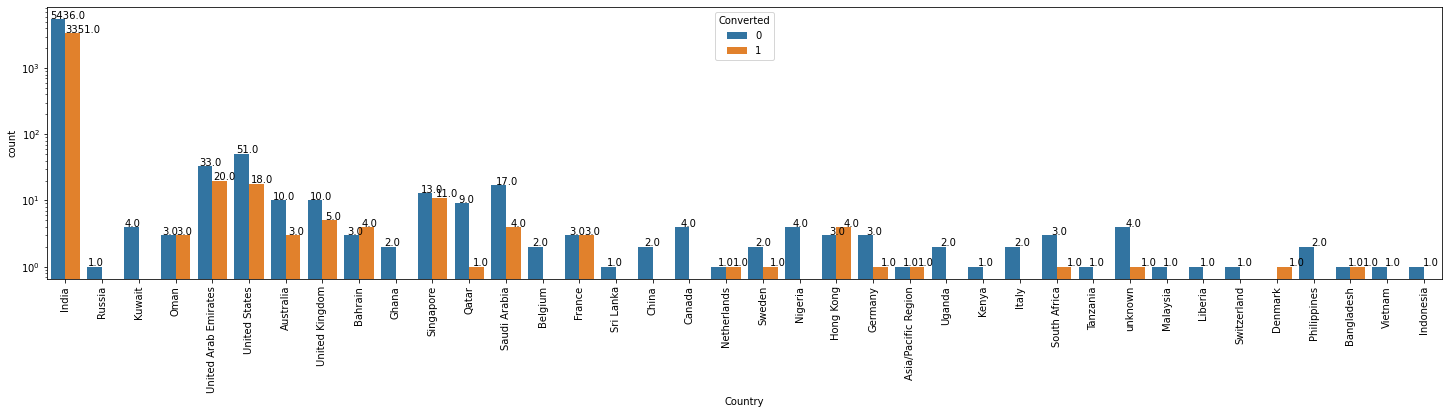

In [100]:
plt.figure(figsize = (25,5))
ax= sns.countplot(x = "Country", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

Most values are 'India' , we can tell core business is coming from India market
They have potential to make business from US, Middle East & Europe

## Specialization

In [101]:
lead.Specialization.value_counts()

Others                               3282
Finance Management                   959 
Human Resource Management            837 
Marketing Management                 823 
Operations Management                499 
Business Administration              399 
IT Projects Management               366 
Supply Chain Management              346 
Banking, Investment And Insurance    335 
Travel and Tourism                   202 
Media and Advertising                202 
International Business               176 
Healthcare Management                156 
E-COMMERCE                           111 
Hospitality Management               111 
Retail Management                    100 
Rural and Agribusiness               73  
E-Business                           57  
Services Excellence                  40  
Name: Specialization, dtype: int64

In [102]:
lead['Specialization'] = lead['Specialization'].replace(['Others'], 'Other_Specialization')

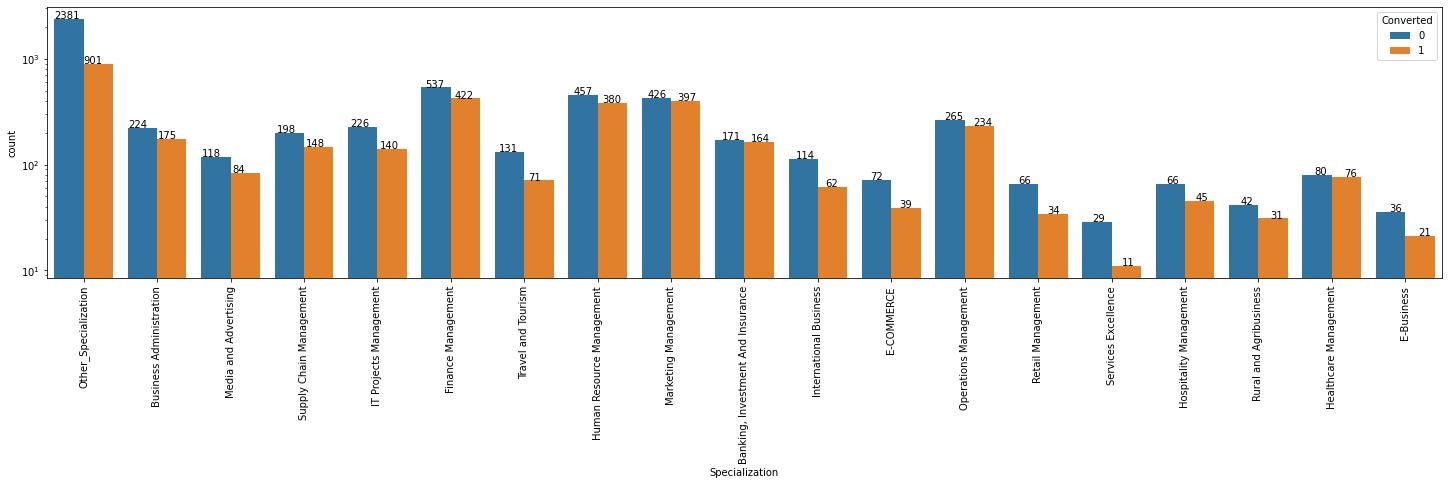

In [103]:
plt.figure(figsize = (25,5))
ax= sns.countplot(x = "Specialization", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

Focus should be more on the Specialization with high conversion rate.

## Occupation

In [104]:
lead['What is your current occupation'].describe()

count     9074      
unique    6         
top       Unemployed
freq      8159      
Name: What is your current occupation, dtype: object

In [105]:
lead['What is your current occupation'].value_counts()

Unemployed              8159
Working Professional    677 
Student                 206 
Other                   15  
Housewife               9   
Businessman             8   
Name: What is your current occupation, dtype: int64

In [106]:
lead['What is your current occupation'] = lead['What is your current occupation'].replace(['Other'], 'Other_Occupation')

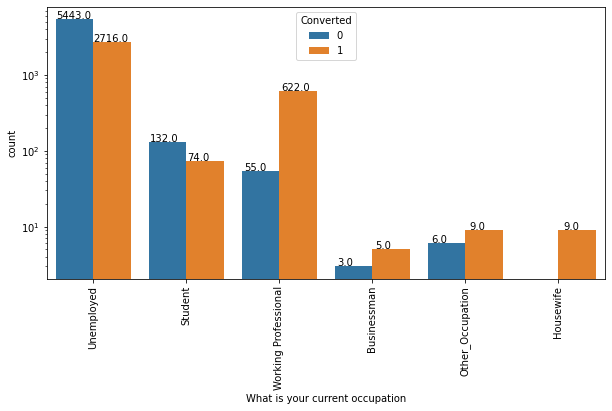

In [107]:
plt.figure(figsize = (10,5))
ax= sns.countplot(x = "What is your current occupation", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

Working Professionals going for the course have high chances of joining it.
Unemployed leads are the most in numbers but has around 30-35% conversion rate.

## What matters most to you in choosing a course	

In [111]:
lead['What matters most to you in choosing a course'].describe()


count     9074                   
unique    3                      
top       Better Career Prospects
freq      9072                   
Name: What matters most to you in choosing a course, dtype: object

In [112]:
lead['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      9072
Flexibility & Convenience    1   
Other                        1   
Name: What matters most to you in choosing a course, dtype: int64

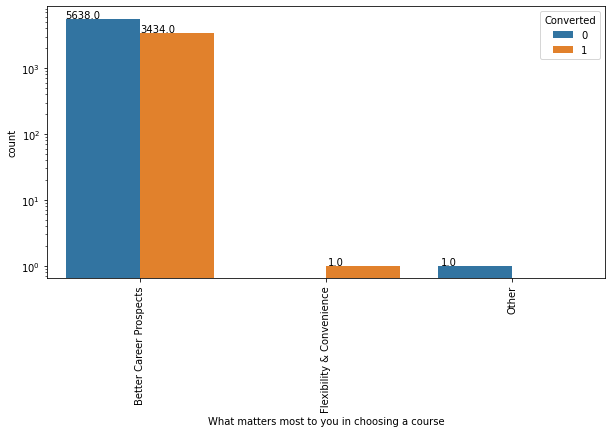

In [113]:
plt.figure(figsize = (10,5))
ax= sns.countplot(x = "What matters most to you in choosing a course", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

Most entries are 'Better Career Prospects'. No Inference can be drawn with this parameter.


## Search 

In [115]:
lead.Search.describe()


count     9074
unique    2   
top       No  
freq      9060
Name: Search, dtype: object

In [116]:
lead.Search.value_counts()


No     9060
Yes    14  
Name: Search, dtype: int64

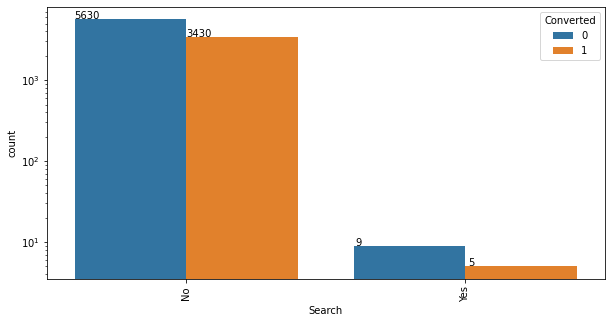

In [117]:
plt.figure(figsize = (10,5))
ax= sns.countplot(x = "Search", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

Most entries are 'No'. No Inference can be drawn with this parameter.

## Magazine 

In [118]:
lead.Magazine.describe()


count     9074
unique    1   
top       No  
freq      9074
Name: Magazine, dtype: object

In [119]:
lead.Magazine.value_counts()


No    9074
Name: Magazine, dtype: int64

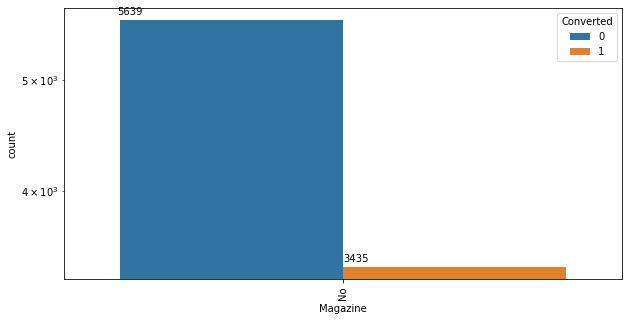

In [120]:
plt.figure(figsize = (10,5))
ax= sns.countplot(x = "Magazine", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

All entries are 'No'. No Inference can be drawn with this parameter.


Repeat this activity for all the variables to find out which are the variables which will be useful to the model

## Results

Based on the univariate analysis we have seen that many columns are not adding any information to the model, hence we can drop them for frther analysis

In [123]:
lead = lead.drop(['What matters most to you in choosing a course','Search',
                  'Magazine','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                  'Update me on Supply Chain Content',
           'Get updates on DM Content','I agree to pay the amount through cheque',
                  'A free copy of Mastering The Interview','Country'],1)

In [124]:
print("Original Columns {} % Retained".format(round((100* len(lead.columns)/len(lead_dub.columns)),2)))

Original Columns 40.54 % Retained


In [125]:
print("Original Data {} % Retained".format(round((len(lead) * 
                                                     len(lead.columns))*100/(len(lead_dub.columns)*len(lead_dub)),2)))

Original Data 39.81 % Retained


In [126]:
lead.shape

(9074, 15)

In [127]:
lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity,Converted
0,API,Olark Chat,No,No,0.0,0,0.0,Page Visited on Website,Other_Specialization,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified,0
1,API,Organic Search,No,No,5.0,674,2.5,Email Opened,Other_Specialization,Unemployed,Ringing,Not Sure,Mumbai,Email Opened,0
2,Landing Page Submission,Direct Traffic,No,No,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened,1
3,Landing Page Submission,Direct Traffic,No,No,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified,0
4,Landing Page Submission,Google,No,No,2.0,1428,1.0,Converted to Lead,Other_Specialization,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified,1


## Data Preparation

In [128]:
colname=[]
for x in lead.columns:
    if lead[x].dtype=='object':
        colname.append(x)
colname

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'Tags',
 'Lead Quality',
 'City',
 'Last Notable Activity']

In [130]:
# For preprocessing the data
from sklearn import preprocessing

le=preprocessing.LabelEncoder()

for x in colname:
    lead[x]=le.fit_transform(lead[x])

In [131]:
lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity,Converted
0,0,3,0,0,0.0,0,0.0,7,13,4,8,1,0,8,0
1,0,4,0,0,5.0,674,2.5,3,13,4,14,3,0,4,0
2,1,0,0,0,2.0,1532,2.0,3,1,3,19,2,0,4,1
3,1,0,0,0,1.0,305,1.0,9,11,4,14,3,0,8,0
4,1,2,0,0,2.0,1428,1.0,0,13,4,19,2,0,8,1


# Defining the independent and dependent variables


In [132]:
Y = lead['Converted']
X = lead.drop('Converted', axis = 1)

# Spilting the data into training and testing 

In [133]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.30, random_state=42)

# Feature Scaling

In [134]:
from sklearn.preprocessing import StandardScaler
Scaler_X = StandardScaler()
X_train = Scaler_X.fit_transform(X_train)
X_test = Scaler_X.transform(X_test)

# Creating a custom function to plot Confusion Matrix


In [135]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import itertools


def plot_confusion_metrix(cm,classes,
                         normalize=False,
                         title='Confusion Matrix',
                         cmap=plt.cm.Greens):
    """this function prints and plot the confusion matirx
    Normalization can be applied by setting 'normalize=True'
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix")
        
    print(cm)
    
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=35)
    plt.yticks(tick_marks,classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() /2.
    
    for i , j in itertools.product(range(cm.shape[0]), range(cm.shape[0])):
        plt.text(j, i, format(cm[i,j], fmt),
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')
    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Decision Tree Classifier


In [137]:
#predicting using the Decision_Tree_Classifier
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree=DecisionTreeClassifier()
model_DecisionTree.fit(X_train,Y_train)

#fit the model on the data and predict the values
Y_pred=model_DecisionTree.predict(X_test)

Confusion Matrix
[[1533  129]
 [ 158  903]]


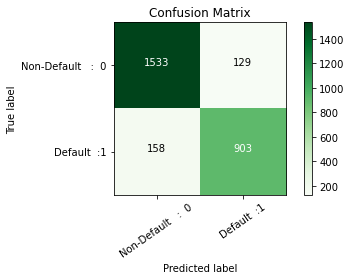

Classification report
              precision    recall  f1-score   support

           0       0.91      0.92      0.91      1662
           1       0.88      0.85      0.86      1061

    accuracy                           0.89      2723
   macro avg       0.89      0.89      0.89      2723
weighted avg       0.89      0.89      0.89      2723

Accuracy of the model: 0.8946015424164524


In [138]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report

conf_matrix = confusion_matrix(Y_test,Y_pred)
plot_confusion_metrix(conf_matrix,classes=['Non-Default   :  0','Default  :1'])
plt.show()

print('Classification report')

print(classification_report(Y_test,Y_pred))

acc= accuracy_score(Y_test,Y_pred)
print("Accuracy of the model:", acc)

## Saving the Machine learning Model 

In [140]:
import pickle

In [142]:
pickle.dump(model_DecisionTree, open(r'C:\Users\saura\Downloads\datasets\model.pkl', 'wb'))


# Deployment

In [150]:
import flask 
from flask import request, render_template
import pickle
import numpy as np

In [151]:
app = Flask()

NameError: name 'Flask' is not defined

In [149]:
model = pickle.load(open(r'C:\Users\saura\Downloads\datasets\Models\model.pkl','wb'))

UnsupportedOperation: read